**MEDICAL INSURANCE COST PREDICTION USING TPOT**



In [23]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
path='/content/drive/MyDrive/AutoML datasets/insurance.csv'
df = pd.read_csv(path)

**DATA PREPROCESSING AND VISUALIZATION**

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
#To check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
#To describe our dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


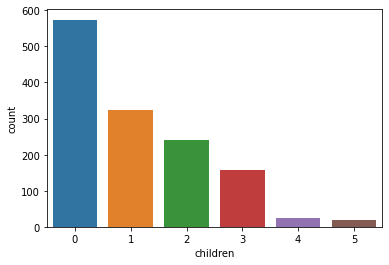

In [29]:
sns.countplot('children', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


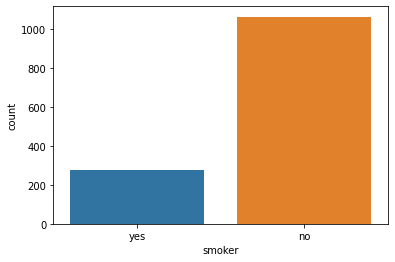

In [30]:
sns.countplot('smoker', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


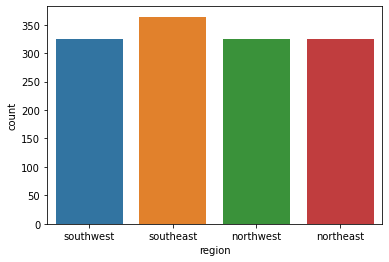

In [31]:
sns.countplot('region', data=df)

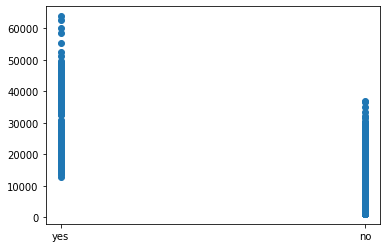

In [32]:
plt.scatter('smoker', 'charges', data=df)

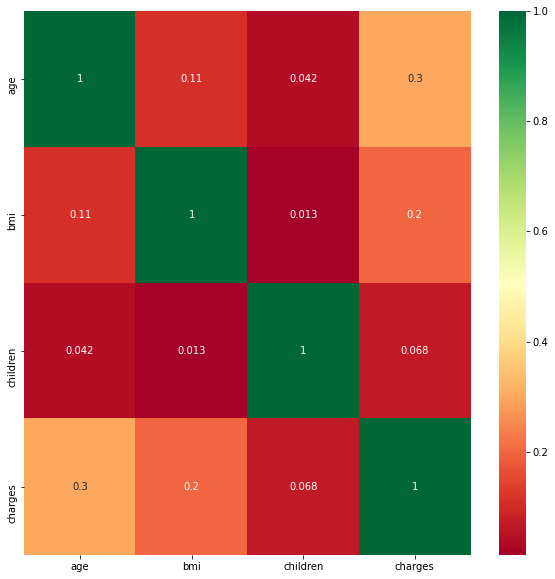

In [33]:
#correlation heatmap
corrmat = df.corr()

top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
#Convert categorical variable to numbers 

def smoker(yes):
  if yes == 'yes':
    return 1
  else:
    return 0


df['smoker']=df['smoker'].apply(smoker) #we are are apply data function over dataframe

def sex(s):
  if s =='male':
    return 1
  else:
    return 0
df['sex'] = df['sex'].apply(sex)

In [36]:
#separating the X and Y from the dataset
X = df.drop(['charges', 'region'], axis=1)
Y = df['charges']
print(X.shape)
print(Y.shape)

(1338, 5)
(1338,)


In [37]:
#using sklearn to split training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**BUILDING TPOT MODEL**

In [38]:
#install TPOT
!pip install tpot

In [39]:
from tpot import TPOTRegressor
from sklearn import metrics

In [40]:
tpot = TPOTRegressor(
    generations = 5,
    population_size = 50,
    verbosity = 2,
    random_state = 42,
    max_time_mins = 5,
    max_eval_time_mins = 2
    
)

tpot.fit(X_train, Y_train)


Generation 1 - Current best internal CV score: -21588458.01340678

Generation 2 - Current best internal CV score: -21588458.01340678

Generation 3 - Current best internal CV score: -21457462.26178468

Generation 4 - Current best internal CV score: -21302517.068250787

5.02 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=5,
              log_file=None, max_eval_time_mins=2, max_time_mins=5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=50,
              random_state=42, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

In [41]:
y_pred = tpot.predict(X_test)

In [42]:
print(metrics.mean_squared_error(Y_test, y_pred))

19174348.77880564


In [43]:
print(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

4378.852449992536
